**2021 Lindoscope workshop**

<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Lindoscope.png?raw=True'/></p>

In [175]:
# @title Install dependencies
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import math


### Import the data from the local directory
Go to the file containg the excel trained data and paste the directory in the path

In [ ]:
######### Importing the data
path = r'C:\Users\shossein\Desktop\LINdoscope_Pupile'
path_Preprocessed = r'C:\Users\shossein\Desktop\LINdoscope_Pupile\Preprocessed' # use your path

######################### Training Data
all_training = glob.glob(path + "/*.csv")

li = []

for filename in all_training:
    df_training = pd.read_csv(filename, index_col=None, header=2)
    li.append(df_training)

frame_training = pd.concat(li, axis=0, ignore_index=True)
# frame_training
######################### Camera & laser analogue
all_analogue = glob.glob(path + "/*.xlsx")

ii = []

for filename in all_analogue:
    df_analogue = pd.read_excel(filename,  sheet_name = 1, header=0)
    ii.append(df_analogue)

frame_analogue = pd.concat(ii, axis=1, ignore_index=False)
# frame_analogue

### Preprocess the data
To clean the data we have to first get rid of small liklihood

In [180]:
############   preprocessing the data

threshold = 0.7 # to accept the coordinate

training_filtered = frame_training[(frame_training["likelihood"] >= threshold) # Filtering all concatenated training data
         &  (frame_training["likelihood.1"] >= threshold)
         &  (frame_training["likelihood.2"] >= threshold)
         &  (frame_training["likelihood.3"] >= threshold)] # filtered dataframe

In [181]:
training_filtered

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,46.739307,39.914024,1.000000,75.254128,66.198280,1.000000,47.646152,67.741287,1.0,76.463989,40.675724,1.000000
1,1,46.739307,40.050922,1.000000,75.254128,67.152992,1.000000,47.646152,67.863991,1.0,76.474701,40.675724,1.000000
2,2,46.746220,40.050922,1.000000,75.299652,67.152992,1.000000,47.646152,67.863991,1.0,76.549980,40.675724,1.000000
3,3,46.746220,39.986885,1.000000,75.299652,67.004707,1.000000,47.313179,67.852524,1.0,76.549980,40.675724,1.000000
4,4,46.674152,39.914024,1.000000,75.299652,66.739258,1.000000,47.313179,67.852524,1.0,76.549980,40.571690,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,1001,110.519768,52.653149,0.999994,77.046066,121.880829,0.999985,61.978199,67.966293,1.0,127.406036,106.926987,0.999999
7254,1002,110.424591,52.653149,0.999998,77.645020,122.608368,0.999991,61.978199,68.049179,1.0,127.576752,107.080917,0.999999
7255,1003,109.802170,52.653149,0.999998,78.996323,123.689728,0.999982,61.978199,68.049179,1.0,127.576752,107.639137,1.000000
7256,1004,109.550613,51.880363,0.999997,78.996323,123.689728,0.999991,61.786312,68.049179,1.0,127.406036,107.639137,1.000000


### Calculating the Eucleadian Distance
In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, 
therefore occasionally being called the Pythagorean distance

In [244]:
# EXERCISE_3: Difine a function for Eucleadian Distance
#################################################
## a function
raise NotImplementedError("Calculate the Eucleadian Distance")
#################################################
...


NotImplementedError: Calculate the Eucleadian Distance

[*Click for solution*](https://github.com/TeamPrigge/Lindoscope/blob/main/Excercise_3.py)



In [182]:
result_right_left = []
result_top_bottom = []
for i in range (len(training_filtered["x.1"])):
    x=training_filtered["x"][i]    #top
    y=training_filtered["y"][i]    #top
    x1=training_filtered["x.1"][i] #bottom
    y1=training_filtered["y.2"][i]  #bottom
    top_bottom = calculateDistance(x,y,x1,y1)
    result_top_bottom.append(top_bottom)

    x2=training_filtered["x.2"][i]    #left
    y2=training_filtered["y.2"][i]    #left
    x3=training_filtered["x.3"][i]   #right
    y3=training_filtered["y.3"][i]   #right
    right_left = calculateDistance(x2,y2,x3,y3)
    result_right_left.append(right_left)
    

### Plotting some figures
Now we plot the Pupil diameter and compare that to the stimulation paradigme

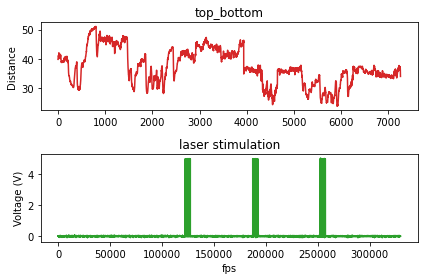

In [236]:
fig, ax = plt.subplots(2)


ax[0].plot(result_top_bottom, 'tab:red' ) # top_bottom distance for pupilometry
ax[0].set_title('top_bottom') 
ax[0].set_ylabel('Distance') 

ax[1].plot(frame_analogue.iloc[:,1], 'tab:green') # laser stimulation == index 1(ai1)
ax[1].set_title('laser stimulation')
ax[1].set_ylabel('Voltage (V)')
ax[1].set_xlabel('fps')

fig.tight_layout()



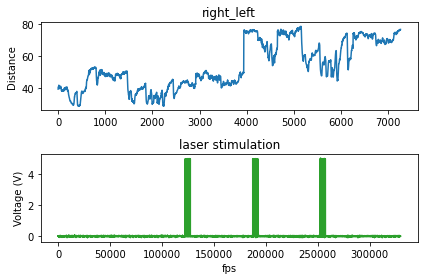

In [238]:

fig, ax = plt.subplots(2)

ax[0].plot(result_right_left, 'tab:blue') # right_left distance for pupilometry
ax[0].set_title('right_left')
ax[0].set_ylabel('Distance') 

ax[1].plot(frame_analogue.iloc[:,1], 'tab:green') # laser stimulation == index 1(ai1)
ax[1].set_title('laser stimulation')
ax[1].set_ylabel('Voltage (V)')
ax[1].set_xlabel('fps')

fig.tight_layout()

In [208]:
# # plt.plot(frame_analogue.iloc[2420:2450,4])

# # for local maxima to find the peaks of camera fps
# stack = np.array(frame_analogue.iloc[:,4]) # column for camera
# prev = stack[0]
# thresh = 4 # threshold to detect the peak
# peaks = []

# for num, i in enumerate(stack[1:], 1):
#     if i> thresh:
#         peaks.append(num)
#     prev = i 

# print(np.size(peaks))

62987


### Looking at some extra traces from camera and animal distance


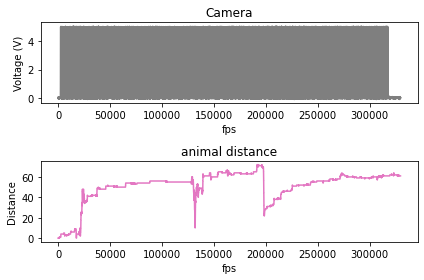

In [241]:
fig, ax = plt.subplots(2)

ax[0].plot(frame_analogue.iloc[:,4], 'tab:gray') # Camera frequency
ax[0].set_title('Camera')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_xlabel('fps') 

ax[1].plot(frame_analogue.iloc[:,6], 'tab:pink') # animal distance
ax[1].set_title('animal distance')
ax[1].set_ylabel('Distance')
ax[1].set_xlabel('fps')

fig.tight_layout()